Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Read data

In [3]:
data = pd.read_csv('IMDB Dataset.csv', encoding = 'latin1')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Hers is our data. We need to reviews according to sentiment

In [6]:
data.sentiment.unique()

array(['positive', 'negative'], dtype=object)

Convert these to our values

In [8]:
data.sentiment = [0 if i == "positive" else 1 for i in data.sentiment]

Data Visualization

Text(0.5, 1.0, 'Count of sentiment')

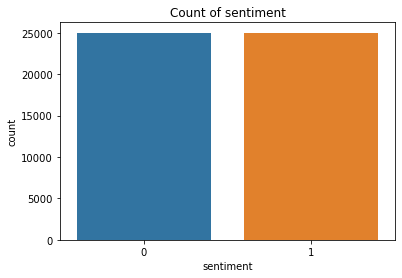

In [9]:
import seaborn as sns
sns.countplot(data.sentiment)
plt.title("Count of sentiment")

In [10]:
data.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

Clean data our model and remove characters which are not letters

In [14]:
import re
first_sample = data.review[9]
sample = re.sub("[^a-zA-Z]"," ",first_sample)
sample = sample.lower()
print("[{}] convert to \n[{}]".format(data.review[9],sample))

[If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!] convert to 
[if you like original gut wrenching laughter you will like this movie  if you are young or old then you will love this movie  hell even my mom liked it  br    br   great camp   ]


StopWords turn

In [15]:
import nltk
from nltk.corpus import stopwords

sample = nltk.word_tokenize(sample)
print(sample)

['if', 'you', 'like', 'original', 'gut', 'wrenching', 'laughter', 'you', 'will', 'like', 'this', 'movie', 'if', 'you', 'are', 'young', 'or', 'old', 'then', 'you', 'will', 'love', 'this', 'movie', 'hell', 'even', 'my', 'mom', 'liked', 'it', 'br', 'br', 'great', 'camp']


Tokenize provides us split the sentence Drop Unnecessary Words

In [16]:
sample = [word for word in sample if not word in set(stopwords.words("english"))]
print(sample)

['like', 'original', 'gut', 'wrenching', 'laughter', 'like', 'movie', 'young', 'old', 'love', 'movie', 'hell', 'even', 'mom', 'liked', 'br', 'br', 'great', 'camp']


Lemmatization

In [17]:
lemma = nltk.WordNetLemmatizer()
sample = [lemma.lemmatize(word) for word in sample]
sample = " ".join(sample)

In [18]:
text_list = []
for i in data.review:
    text = re.sub("[^a-zA-Z]"," ",i)
    text = text.lower()
    text = nltk.word_tokenize(text)
    lemma = nltk.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text]
    
    text = " ".join(text)
    text_list.append(text)

In [20]:
text_list[:5]

['one of the other reviewer ha mentioned that after watching just oz episode you ll be hooked they are right a this is exactly what happened with me br br the first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it is hardcore in the classic use of the word br br it is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda em city is home to many aryan muslim gangsta latino christian italian irish and more so scuffle death stare dodgy dealing and shady agreement are never far away br br i would say the main appeal of the show is due to the fact that it go where other show wouldn t dare forget pretty picture pain

Bag of Words, clean and relevant words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 1000

cou_vec=CountVectorizer(max_features=max_features)
sparce_matrix = cou_vec.fit_transform(text_list).toarray()

all_words = cou_vec.get_feature_names()
print("Most used 50 words:", all_words[:50])

Most used 50 words: ['ability', 'able', 'about', 'above', 'absolutely', 'accent', 'across', 'act', 'acted', 'acting', 'action', 'actor', 'actress', 'actual', 'actually', 'add', 'admit', 'adult', 'adventure', 'after', 'again', 'against', 'age', 'ago', 'agree', 'air', 'alien', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'amazing', 'america', 'american', 'among', 'amount', 'an', 'and', 'animal', 'animation', 'annoying', 'another', 'any', 'anyone', 'anything']


Naive Bayes model

Split data to train and test

In [23]:
y =data.iloc[:, 1].values
x = sparce_matrix

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [25]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)
print("acc: ", nb.score(xtest, ytest))

acc:  0.8101


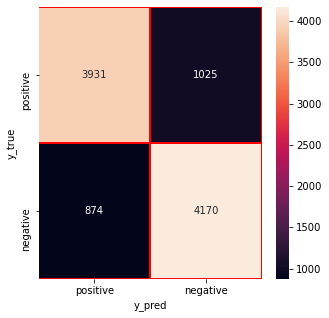

In [27]:
y_pred = nb.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns

names = ["positive", "negative"]
cm = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

RandomForest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier(n_estimators = 10, random_state=42)
rf.fit(xtrain, ytrain)
print("acc: " , rf.score(xtest, ytest))

acc:  0.7667


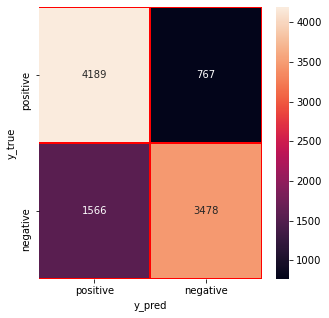

In [32]:
y_pred = rf.predict(xtest)

from sklearn.metrics import confusion_matrix
import seaborn as sns

names = ["positive", "negative"]
cm = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
print("Logistic Regression accuracy: ",lr.score(xtest,ytest))

Logistic Regression accuracy:  0.867


/home/chi/anaconda3/envs/nltkENv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


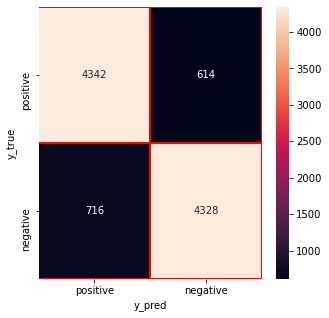

In [35]:
y_pred = lr.predict(xtest)

from sklearn.metrics import confusion_matrix
import seaborn as sns

names = ["positive", "negative"]
cm = confusion_matrix(ytest, y_pred)
f, ax = plt.subplots(figsize = (5,5))

#sns.heatmap(cm, annot = True, linewidth = .5, linecolor = "r", fmt = ".of", ax = ax)

sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)

plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()